In [ ]:
pip install catboost scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных и разделение на тестовую и обучающую выборки

In [3]:
# Загрузка датасета
data = pd.read_csv('SI_data.csv')
data.head()

,SI log10,MaxAbsEStateIndex,MaxAbsEStateIndex log10,MaxEStateIndex,MaxEStateIndex log10,MinAbsEStateIndex,MinEStateIndex,MinEStateIndex_log10_sign,qed,qed log10,...,fr_piperdine,fr_piperzine,fr_priamide,fr_quatN,fr_sulfide,fr_sulfonamd,fr_tetrazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.449093,5.094096,0.707067,5.094096,0.707067,0.387225,0.387225,0.142147,0.417362,-0.379487,...,0,0,0,0,0,0,0,0,3,0
1,0.845098,3.961417,0.597851,3.961417,0.597851,0.533868,0.533868,0.185788,0.462473,-0.334914,...,0,0,0,0,0,0,0,0,3,0
2,-0.142668,2.627117,0.419479,2.627117,0.419479,0.543231,0.543231,0.188431,0.260923,-0.583488,...,0,0,0,2,0,0,0,0,3,0
3,1.800960,5.097360,0.707345,5.097360,0.707345,0.390603,0.390603,0.143203,0.377846,-0.422686,...,0,0,0,0,0,0,0,0,4,0
4,0.113943,5.150510,0.711850,5.150510,0.711850,0.270476,0.270476,0.103966,0.429038,-0.367504,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Разделение на признаки и целевую переменную
X = data.drop(columns=['SI log10'])
y = data['SI log10']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Модель CatBoostRegressor

**CatBoostRegressor** чаще всего используется, когда у есть категориальные признаки, которые нужно эффективно обрабатывать. Эта модель прекрасно справляется с высокоразмерными данными и часто демонстрирует высокую точность, минимизируя вероятность переобучения. К сильным сторонам CatBoost можно отнести его автоматическую обработку категориальных переменных и высокую скорость обучения, в то время как среди слабых сторон стоит отметить необходимость выбора параметров для достижения оптимального результата и достаточно большие требования к памяти.

In [7]:
# Инициализация и обучение модели CatBoostRegressor
CatBoost = CatBoostRegressor(
    iterations=1000,           # кол-во деревьев
    learning_rate=0.01,        # скорость обучения
    depth=5,                  # глубина дерева;
    verbose=0,                # отключить вывод логов
)
CatBoost.fit(X_train, y_train)

In [8]:
# Предсказание на тестовой выборке
y_pred_CatBoost = CatBoost.predict(X_test)

In [9]:
# Оценка качества модели (MSE)
mse_CatBoost = mean_squared_error(y_test, y_pred_CatBoost)
print(f'MSE: {mse_CatBoost:.4f}')

# Корень из MSE для получения RMSE
rmse_CatBoost = np.sqrt(mse_CatBoost)
print(f'RMSE: {rmse_CatBoost:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_CatBoost = mean_absolute_error(y_test, y_pred_CatBoost)
print(f'MAE: {mae_CatBoost:.4f}')

# Коэффициент детерминации (R²)
r2_CatBoost = r2_score(y_test, y_pred_CatBoost)
print(f'R²: {r2_CatBoost:.4f}')

MSE: 0.3536
RMSE: 0.5947
MAE: 0.4482
R²: 0.2951


В результате обучения модели CatBoost на выбранном датасете, состоящем из 1001 строки и 249 столбцов, были получены следующие метрики качества: MSE составляет 0.3536, RMSE — 0.5947, MAE — 0.4482, а коэффициент детерминации R² равен 0.2951. Предварительное логарифмирование целевой переменной позволило приблизить её распределение к нормальному, что положительно сказалось на устойчивости модели. Значение R² показывает, что около 29.5% дисперсии целевой переменной объясняется построенной моделью. Однако, этот показатель нельзя считать высоким, что может указывать на наличие сложных нелинейных зависимостей или недостаточную информативность признаков, использованных для обучения. Модель демонстрирует среднюю точность предсказаний, а для её улучшения стоит рассмотреть возможное улучшение признакового пространства, тонкую настройку гиперпараметров или использование дополнительных методов обработки данных.

# Модель LinearRegression (линейная регрессия)

**LinearRegression** применяется в ситуациях, когда данные хорошо поддаются линейному моделированию. Эта модель проста в интерпретации и очень быстрая в обучении. Сильные стороны включают простоту и возможность понимания модели, а среди недостатков – невозможность эффективно работать с нелинейными зависимостями и чувствительность к выбросам.

In [15]:
# Создание и обучение модели
LinReg = LinearRegression()
LinReg.fit(X, y)

LinearRegression()

In [17]:
# Предсказание на тестовой выборке
y_pred_LinReg = LinReg.predict(X_test)

In [19]:
# Оценка качества модели (MSE)
mse_LinReg = mean_squared_error(y_test, y_pred_LinReg)
print(f'MSE: {mse_LinReg:.4f}')

# Корень из MSE для получения RMSE
rmse_LinReg = np.sqrt(mse_LinReg)
print(f'RMSE: {rmse_LinReg:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_LinReg = mean_absolute_error(y_test, y_pred_LinReg)
print(f'MAE: {mae_LinReg:.4f}')

# Коэффициент детерминации (R²)
r2_LinReg = r2_score(y_test, y_pred_LinReg)
print(f'R²: {r2_LinReg:.4f}')

MSE: 0.3470
RMSE: 0.5890
MAE: 0.4425
R²: 0.3084


В ходе обучения модели линейной регрессии на датасете с 1001 наблюдением и 249 признаками были получены следующие значения метрик: MSE = 0.3470, RMSE = 0.5890, MAE = 0.4425, R² = 0.3084. Логарифмирование целевой переменной способствовало приближению её распределения к нормальному, что могло положительно сказаться на качестве модели. Тем не менее, значение R² показывает, что модель объясняет лишь около 31% дисперсии целевой переменной, что указывает на ограниченную предсказательную способность. Значения ошибок (MSE, RMSE и MAE) свидетельствуют о средней точности предсказаний, однако для более детальной оценки стоит провести сравнительный анализ с другими моделями или попытаться улучшить существующую, например, с помощью отбора признаков либо регуляризации.в.

# Модель DecisionTreeRegressor (регрессия лесом решений)

**DecisionTreeRegressor** полезна для работы с непрерывными и категориальными данными и не требует предварительной обработки (например, нормализации). Сильными сторонами данной модели являются легкость в интерпретации, а также способность захватывать сложные, нелинейные зависимости. Однако дерево решения склонно к переобучению, что является его слабой стороной, особенно при недостатке данных.

In [22]:
# Создание и обучение модели
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

DecisionTreeRegressor()

In [24]:
# Предсказание на тестовой выборке
y_pred_tree_model = tree_model.predict(X_test)

In [26]:
# Оценка качества модели (MSE)
mse_tree_model = mean_squared_error(y_test, y_pred_tree_model)
print(f'MSE: {mse_tree_model:.4f}')

# Корень из MSE для получения RMSE
rmse_tree_model = np.sqrt(mse_tree_model)
print(f'RMSE: {rmse_tree_model:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_tree_model = mean_absolute_error(y_test, y_pred_tree_model)
print(f'MAE: {mae_tree_model:.4f}')

# Коэффициент детерминации (R²)
r2_tree_model = r2_score(y_test, y_pred_tree_model)
print(f'R²: {r2_tree_model:.4f}')

MSE: 0.1305
RMSE: 0.3613
MAE: 0.1221
R²: 0.7398


В ходе обучения модели DecisionTreeRegressor на датасете из 1001 наблюдения и 249 признаков, где целевая переменная была предварительно логарифмирована для нормализации распределения, были получены следующие результаты метрик: среднеквадратичная ошибка (MSE) составила 0.1305, среднекорневая квадратичная ошибка (RMSE) — 0.3613, средняя абсолютная ошибка (MAE) — 0.1221, а коэффициент детерминации (R²) достиг 0.7398. Эти значения свидетельствуют о том, что модель достаточно хорошо объясняет дисперсию целевой переменной (R² близок к 0.74) и обеспечивает адекватную точность прогнозирования при сравнительно низких ошибках. Использование логарифмирования целевой переменной позволило улучшить показатели качества модели за счет более соответствующего распределения данных.

# Модель Gradient Boosting (градиентный бустинг)

**Gradient Boosting** часто используется в ситуациях с большим количеством данных, где важна высокая точность. Эта модель помогает уменьшить ошибку за счет последовательного обучения. К сильным сторонам можно отнести гибкость и возможность обрабатывать сложные зависимости в данных. Тем не менее, среди её слабостей – высокая вычислительная сложность и возможность переобучения.

In [29]:
# Создание и обучение модели
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

GradientBoostingRegressor()

In [30]:
# Предсказание на тестовой выборке
y_pred_gb = gb_model.predict(X_test)

In [31]:
# Оценка качества модели (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'MSE: {mse_gb:.4f}')

# Корень из MSE для получения RMSE
rmse_gb = np.sqrt(mse_gb)
print(f'RMSE: {rmse_gb:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f'MAE: {mae_gb:.4f}')

# Коэффициент детерминации (R²)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'R²: {r2_gb:.4f}')

MSE: 0.2240
RMSE: 0.4732
MAE: 0.3329
R²: 0.5536


В ходе обучения модели градиентного бустинга на датасете из 1001 строки и 249 признаков, целевая переменная была логарифмирована для улучшения её распределения. Итоговые метрики качества показали следующее: среднеквадратичная ошибка (MSE) составила 0.2240, корень из среднеквадратичной ошибки (RMSE) — 0.4732, средняя абсолютная ошибка (MAE) — 0.3329, а коэффициент детерминации (R²) равен 0.5536. Эти результаты свидетельствуют о том, что модель объясняет около 55% дисперсии целевой переменной, демонстрируя умеренное качество предсказаний. Значения ошибок указывают на сравнительно небольшое среднее отклонение прогнозов от настоящих логарифмированных значений целевой переменной, что можно считать удовлетворительным для данной задачи.

# Модель полиномиальной регрессии

**Модель полиномиальной регрессии** лучше всего работает, когда данные имеют выраженную нелинейную зависимость. Она позволяет захватывать сложные взаимосвязи, что делает её полезной в ситуациях с криволинейными зависимостями. Сильные стороны полиномиальной регрессии включают её способность моделировать сложные функции, в то время как слабая сторона заключается в необходимости осторожного выбора степени полинома, чтобы избежать переобучения и потери интерпретируемости.

In [46]:
# Создание и обучение модели
degree = 2  # Степень полинома
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [48]:
# Предсказание на тестовой выборке
y_pred_polyreg = polyreg_model.predict(X_test)

In [50]:
# Оценка качества модели (MSE)
mse_polyreg = mean_squared_error(y_test, y_pred_polyreg)
print(f'MSE: {mse_polyreg:.4f}')

# Корень из MSE для получения RMSE
rmse_polyreg = np.sqrt(mse_polyreg)
print(f'RMSE: {rmse_polyreg:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_polyreg = mean_absolute_error(y_test, y_pred_polyreg)
print(f'MAE: {mae_polyreg:.4f}')

# Коэффициент детерминации (R²)
r2_polyreg = r2_score(y_test, y_pred_polyreg)
print(f'R²: {r2_polyreg:.4f}')

MSE: 0.4708
RMSE: 0.6862
MAE: 0.5392
R²: 0.0615


Обучение модели полиномиальной регрессии на выбранном датасете привело к следующим итоговым метрикам: среднеквадратичная ошибка (MSE) составила 0.4708, корень из среднеквадратичной ошибки (RMSE) — 0.6862, средняя абсолютная ошибка (MAE) — 0.5392, а коэффициент детерминации R² — 0.0615. Применение логарифмирования целевой переменной позволило улучшить её распределение, что, как правило, позитивно сказывается на качестве модели. Однако низкое значение R² говорит о том, что построенная модель объясняет лишь около 6% дисперсии целевой переменной, а значит, её предсказательная способность невысока. Это может указывать на необходимость подбора других признаков, параметров модели или использования других методов для повышения качества прогнозирования.

# Сопоставление результатов

Для подведения итогов необходимо вывести наглядные графики.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


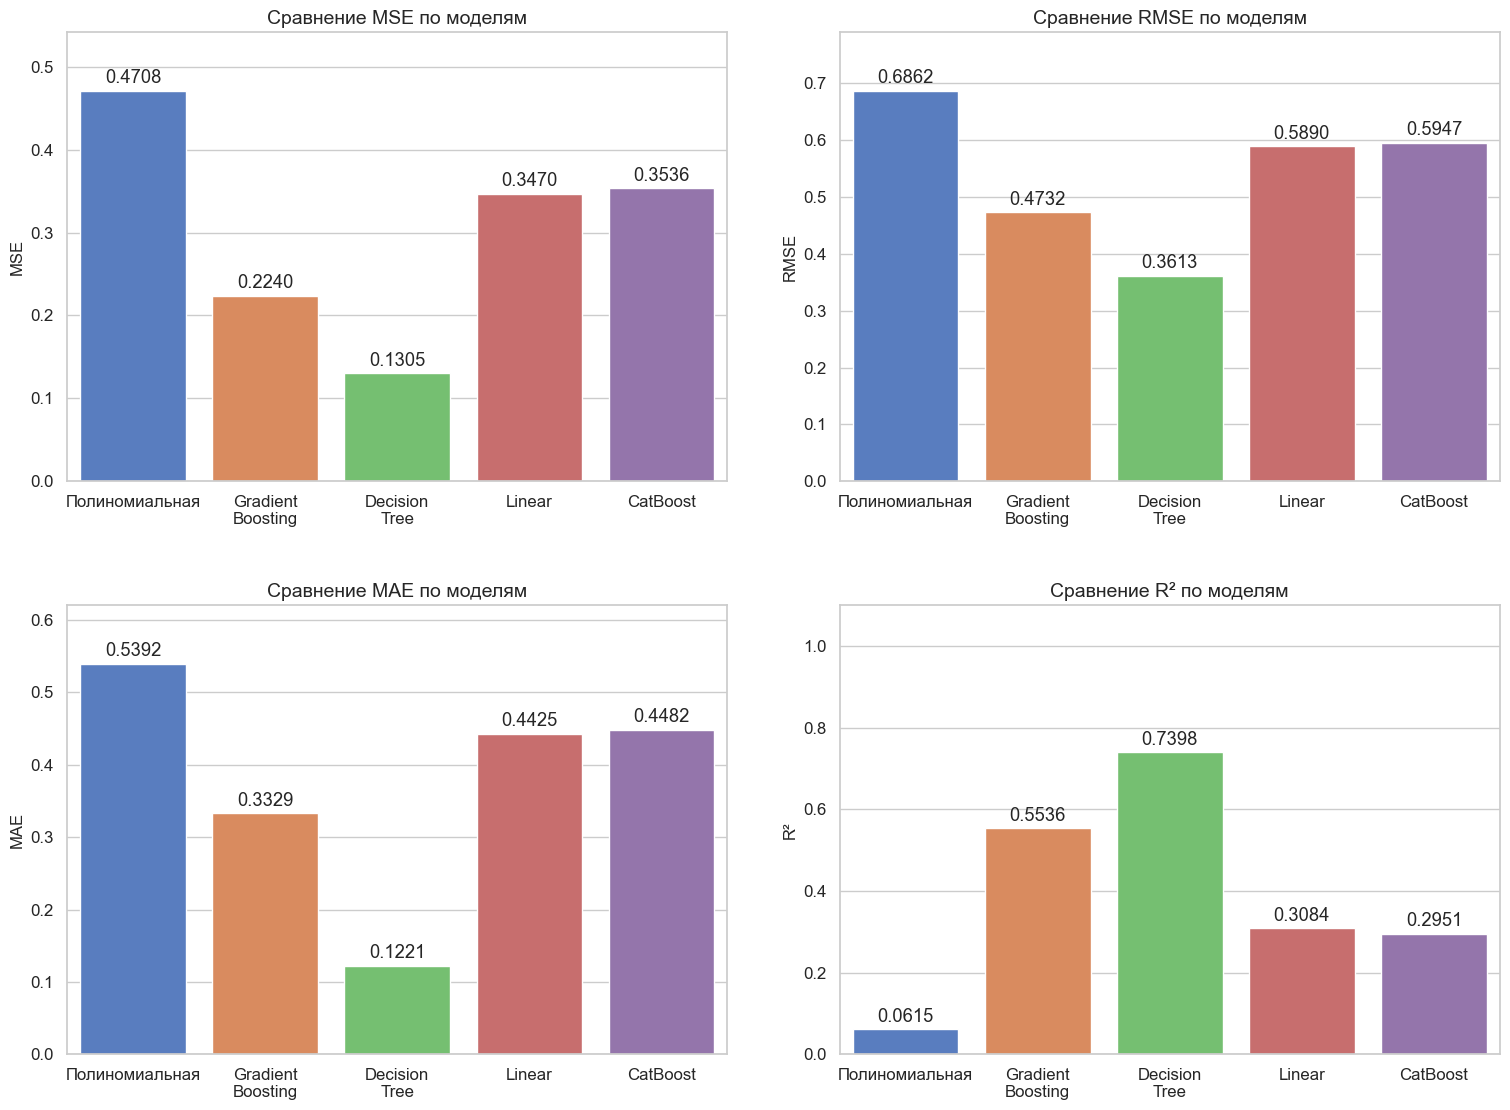

In [53]:
# Данные метрик (замените значения на реальные)
models = ['Полиномиальная', 'Gradient\nBoosting', 'Decision\nTree', 'Linear', 'CatBoost']

metrics = {
    'MSE': [mse_polyreg, mse_gb, mse_tree_model, mse_LinReg, mse_CatBoost],  # Пример значений
    'RMSE': [rmse_polyreg, rmse_gb, rmse_tree_model, rmse_LinReg, rmse_CatBoost],
    'MAE': [mae_polyreg, mae_gb, mae_tree_model, mae_LinReg, mae_CatBoost],
    'R²': [r2_polyreg, r2_gb, r2_tree_model, r2_LinReg, r2_CatBoost]
}

# Настройка стиля
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(16, 12))

# График для MSE
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=metrics['MSE'], hue=models, dodge=False)
plt.title('Сравнение MSE по моделям', fontsize=14)
plt.ylabel('MSE', fontsize=12)
plt.ylim(0, max(metrics['MSE']) * 1.15)
plt.legend().remove()

# График для RMSE
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=metrics['RMSE'], hue=models, dodge=False)
plt.title('Сравнение RMSE по моделям', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, max(metrics['RMSE']) * 1.15)
plt.legend().remove()

# График для MAE
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=metrics['MAE'], hue=models, dodge=False)
plt.title('Сравнение MAE по моделям', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, max(metrics['MAE']) * 1.15)
plt.legend().remove()

# График для R2
plt.subplot(2, 2, 4)
bars = sns.barplot(x=models, y=metrics['R²'], hue=models, dodge=False)
plt.title('Сравнение R² по моделям', fontsize=14)
plt.ylabel('R²', fontsize=12)
plt.ylim(0, 1.1)

# Добавление значений на столбцы
for ax in plt.gcf().axes:
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.4f}", 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', 
            xytext=(0, 9), 
            textcoords='offset points')

plt.tight_layout(pad=3.0)
plt.show()

В результате анализа для прогнозирования значения целевой переменной SI наилучшие результаты продемонстрировала модель DecisionTreeRegressor, которая значительно превосходит остальные подходы по всем основным метрикам качества (наименьшие значения MSE, RMSE и MAE, а также наибольшее значение R² = 0.7398). Остальные модели, включая линейную регрессию, полиномиальную регрессию, градиентный бустинг и CatBoost, продемонстрировали заметно худшие значения как абсолютных, так и относительных ошибок, а их коэффициент детерминации R² для большинства из них оказался существенно ниже (меньше 0.55), что указывает на слабое соответствие прогнозов реальным значениям.

Слабые результаты большинства моделей могут быть связаны с несколькими причинами. Во-первых, несмотря на то, что целевая переменная была преобразована к распределению, близкому к нормальному, распределения признаков могли остаться сильно смещёнными, с пропусками или выбросами, что снижает эффективность «чувствительных» к таким особенностям моделей, например линейной и полиномиальной регрессии, а также градиентного бустинга без тщательного подбора гиперпараметров и глубокого предварительного анализа данных. Во-вторых, болаяой размерность пространства признаков по отношению к количеству наблюдений (1001 строка и 249 столбцов) приводит к риску переобучения или, напротив, к недостаточному обучению моделей с относительно низкой сложностью (например, линейные модели). В таких условиях дерево решений могло оказаться более устойчивым к шуму и способно выявлять важные локальные закономерности, благодаря чему и достигнут столь высокий показатель качества.

Необходимо отметить, что для более объективного сравнения моделей в дальнейшем желательно рассмотреть методы отбора признаков или их агрегации (например, PCA или рекурсивный отбор), регуляризацию, а также более тщательный подбор гиперпараметров, особенно для сложных ансамблевых моделей. Это может повысить качество прогноза и позволить раскрыть потенциал современных моделей машинного обучения.
ы.